(c) 2023 Manuel Razo. This work is licensed under a [Creative Commons
Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/).
All code contained herein is licensed under an [MIT
license](https://opensource.org/licenses/MIT).

# Midiendo el crecimiento de una colonia bacteriana

En este tutorial, analizaremos datos experimentales del crecimiento de una
colonia de bacterias creciendo bajo el microscopio. El objetivo es que
comparemos datos extraídos con la predicción de nuestro modelo teórico.

Comencemos importando los paquetes necesarios. Lo que necesitaremos en este
tutorial es:
- `numpy`: Para análisis numérico.
- `matplotlib`: Para graficar datos.
- `seaborn`: Para darle estilo a nuestras gráfica.
- `glob`: Para buscar archivos de manera sistemática
- `skimage.io`: Para manipular imágenes en Python.

In [1]:
# Importar paquete para analisis numerico
import numpy as np

# Importar paquete para graficar curvas
import matplotlib.pyplot as plt

# Importar paquete para estilo de graficas
import seaborn as sns

# Importar paquete para listar archivos
import glob

# Importar paquete para manipular imagenes
import skimage.io

# Establecer estilo de grafica
sns.set_theme()

## Segmentando imágenes en `Python`

Comencemos importando una de las imágenes de la colonia. Tenemos imágenes en
formato `tif` de microscopía de [contraste de
fase](https://es.wikipedia.org/wiki/Microscopio_de_contraste_de_fases) así como
de [fluorescencia](https://es.wikipedia.org/wiki/Microscopio_de_fluorescencia).
Las imágenes de contraste de fases están nombradas como
```
ecoli_phase_xx.tif
```
y las de fluorescencia
```
ecoli_TRITC_xx.tif
```
Comencemos por importar una de las imágenes de fluorescencia.

In [2]:
# Leer imagen ejemplo
im = skimage.io.imread('../data/ecoli_growth/ecoli_TRITC_05.tif')

# Imprimir contenido
im

array([[205, 205, 205, ..., 205, 205, 206],
       [204, 204, 205, ..., 204, 205, 205],
       [204, 204, 205, ..., 204, 203, 203],
       ...,
       [205, 204, 204, ..., 203, 203, 203],
       [205, 204, 204, ..., 205, 205, 205],
       [205, 204, 204, ..., 205, 205, 205]], dtype=uint16)

Aquí podemos ver que una imagen no es más que un arreglo de números enteros.
Esto debe de tener sentido si pensamos que todo lo que sabe hacer una
computadora es procesar números. El valor de cada entrada representa la
intensidad de un pixel. Para visualizar la imagen, podemos utilizar la función
`plt.imshow()` con nuestra imagen como input.

(-0.5, 1343.5, 1023.5, -0.5)

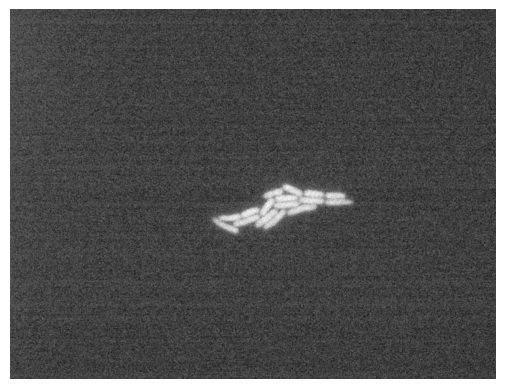

In [3]:
# Mostrar la imagen usando una escala de grises para representar la intensidad
plt.imshow(im, cmap=plt.cm.Greys_r)

# Remover la gradilla que interfiere con la imagen
plt.grid(False)

# Remover ejes para mostrar la imagen nada mas
plt.axis('off')

Ahora es bastante obvio que la serie de números realmente representan los
valores de intensidad de una imagen. 

Para nosotros es obvio cuál parte de la imagen representa bacterias y cuál parte
es el fondo. Al final, el tamaño de la colonia será proporcional al número de
pixeles que contienen bacterias. Nuestro ahora es indicarle a la computadora
cómo hacer esto (un proceso conocido como **segmentar la imagen**). La idea más
sencilla es tomar los pixeles arriba de cierto límite como parte de la colonia.
Para poder implementar esa idea, es útil normalizar los valores de los pixeles
para que tomen valores entre cero y uno.

El primer paso para esta minimización es encontrar cuál es el valor del pixel
más bajo.

In [4]:
# Encontrar valor de pixel mas bajo
np.min(im)

200

Esto significa que si a todos los pixeles les restamos 200, el valor mínimo de
nuestra imagen será de 200.

In [5]:
# Restar valor minimo
im_res = im - np.min(im)

np.min(im_res)

0

Peroe estos valores aún no están normalizados entre cero y uno. Basta con ver
cuál es el valor máximo en esta imagen modificada.

In [6]:
np.max(im_res)

20

Tenemos entonces que dividir todos los valores entre 20 para que el valor máximo
de la imagen sea lo que queremos.

Estos dos pasos lo podemos hacer en un solo paso de manera sencilla.

In [7]:
# Renormalizar imagen para tener valores en el rango [0, 1]
im_float = (im - np.min(im)) / (np.max(im) - np.min(im))

# Mostrar imagen normalizada
im_float

array([[0.25, 0.25, 0.25, ..., 0.25, 0.25, 0.3 ],
       [0.2 , 0.2 , 0.25, ..., 0.2 , 0.25, 0.25],
       [0.2 , 0.2 , 0.25, ..., 0.2 , 0.15, 0.15],
       ...,
       [0.25, 0.2 , 0.2 , ..., 0.15, 0.15, 0.15],
       [0.25, 0.2 , 0.2 , ..., 0.25, 0.25, 0.25],
       [0.25, 0.2 , 0.2 , ..., 0.25, 0.25, 0.25]])

Mostremos nuevamente esta imagen para asegurarnos que nada ha cambiado.

(-0.5, 1343.5, 1023.5, -0.5)

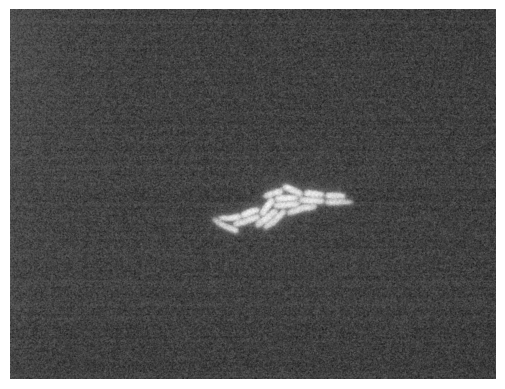

In [8]:
# Mostrar la imagen usando una escala de grises para representar la intensidad
plt.imshow(im_float, cmap=plt.cm.Greys_r)

# Remover la gradilla que interfiere con la imagen
plt.grid(False)

# Remover ejes para mostrar la imagen nada mas
plt.axis('off')

Para encontrar un buen valor que sirva como nuestro límite, es util graficar un
histograma de los valores de los pixeles. En otras palabras, contamos cuántas
veces aparece cada valor en la imagen, y graficamos una barra donde la alutra es
proporcional an número de pixeles con dicho valor. Para esto podemos usar la
función `plt.hist()` con un argumento extra:
- `bins`: número de intervalos en los cuales dividir el segmento. Para nuestro
  caso, usaremos 256, el valor de posibles intensidades en nuestra imagen.

Lo que esperamos de este histograma es que para nuestra imagen muestra, la
mayoría de pixeles deben de ser obscuros⸺por lo tanto de valores más bajos. 
Por ende, graficar el eje $y$ en escala logarítmica nos ayudará a ver la 
diferencia esperada.

Text(0, 0.5, 'count')

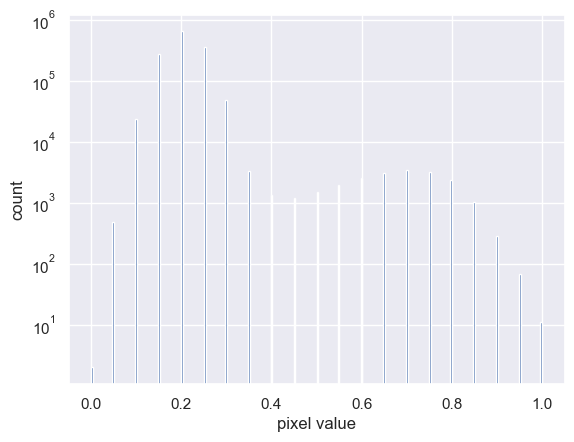

In [10]:
# Graficar histograma de valores de pixeles
plt.hist(im_float.ravel(), bins=256, rwidth=1)
# Escala logaritmica
plt.yscale('log')
# Agregar anotacion en ejes
plt.xlabel("pixel value")
plt.ylabel(("count"))

con este histograma podemos ver que hay dos grupos de pixeles divididos
alrededor de `0.4`. Apliquemos este valor para lograr segmentar la imagen. Para
ello, aplicaremos una operación booleana de "mayor que" `>` a cada uno de los
pixeles. Lo que hará Python es visitar cada pixel, preguntarle si cumplen la
condición de ser mayor que nuestro valor límite. Los pixeles que cumplan la
condición⸺los cuales esperamos sean parte de la colonia⸺tendrán el valor de 1
(`True`) mientras que el resto⸺parte del fondo de la imagen⸺tendrán un valor 
de 0 (`False`).

(-0.5, 1343.5, 1023.5, -0.5)

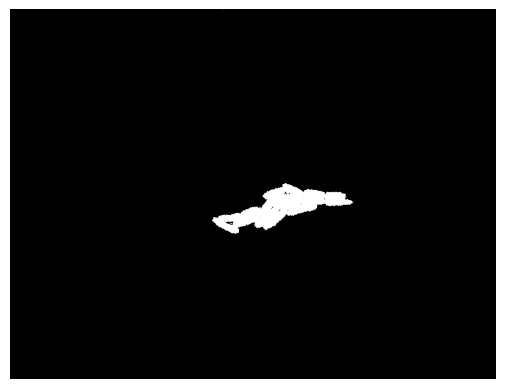

In [11]:
# Definir valor limite (threshold en ingles)
thresh = 0.4

# Aplicar valor a la imagen
im_thresh = im_float > thresh

# Mostrar imagen segmentada
plt.imshow(im_thresh, cmap=plt.cm.Greys_r)

# Remover la gradilla que interfiere con la imagen
plt.grid(False)

# Remover ejes para mostrar la imagen nada mas
plt.axis('off')

¡Excelente! Nuestra sencilla estrategia de aplicar un valor límite para
distinguir pixeles parece haber funcionado bastante bien. El último paso es
contar el número de pixeles que se identificaron como parte de las células. Si
todos los pixeles que son parte de la célula son 1 y el resto 0, podemos
simplemente sumar los valores del arreglo para obtener el número que buscamos.

In [13]:
np.sum(im_thresh)

20596

Este número solo tiene sentido en comparación al resto de las imágenes en la
película.

# Analizando la película entera 

Nuestro objetivo ahora es repetir este análisis para todas las imágenes. Para
esto, utilizaremos el paquete `glob` que nos permite encontrar archivos cuyo
nombre sigue un patrón específico. En nuestro caso, queremos encontrar todos los
archivos con nombre de la forma
```
ecoli_TRITC_xx.tif
```
donde `xx` indica el punto en el que fueron tomados. Usemos este paquete para
listar dichos archivos.

In [12]:
# Listar imagenes de fluorescencia
im_files = np.sort(glob.glob("../data/ecoli_growth/ecoli_TRITC*tif"))

im_files[1:5]

array(['../data/ecoli_growth/ecoli_TRITC_01.tif',
       '../data/ecoli_growth/ecoli_TRITC_02.tif',
       '../data/ecoli_growth/ecoli_TRITC_03.tif',
       '../data/ecoli_growth/ecoli_TRITC_04.tif'], dtype='<U39')

Teniendo la lista de imágenes a ser procesadas, apliquemos nuestra estrategia de
segmentación usando un ciclo `for`.

In [15]:
# Inicializar arreglo para almacenar numero de pixeles segmentados en cada
# imagen
area_array = np.zeros(len(im_files))

# Ciclar por cada imagen
for (i, f) in enumerate(im_files):
    # Importar imagen
    im = skimage.io.imread(f)

    # Normalizar imagen
    im_float = (im - np.min(im)) / (np.max(im) - np.min(im))

    # Aplicar valor limite
    im_thresh = im_float > thresh

    # Contar y almacenar numero de pixeles en imagen segmentada
    area_array[i] = np.sum(im_thresh)

Grafiquemos el resultado de este análisis. Para tener un eje $x$ con sentido,
usemos el hecho de que cada una de las imágenes fueron tomadas en intervalos de
5 minutos.

Text(0, 0.5, 'colony area [pixels]')

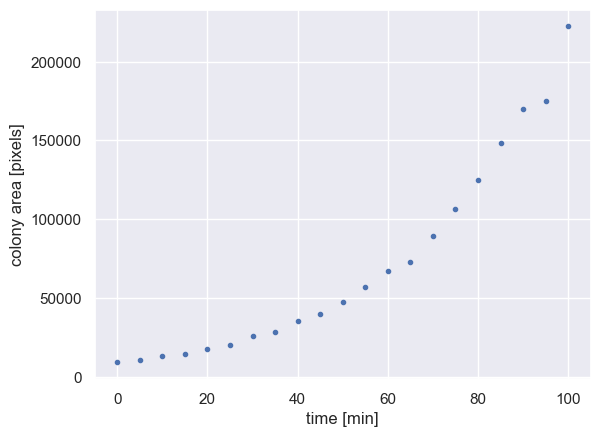

In [17]:
# Definir intervalo de tiempo
dt = 5  # [=] min

# Definir valores de tiempo para eje x
time = dt * np.arange(len(im_files))

# Graficar area en funcion del tiempo
plt.plot(time, area_array, ".")

# Anotar ejes
plt.xlabel("time [min]")
plt.ylabel("colony area [pixels]")

¡Ese crecimiento parece bastante exponencial! ¿Podemos calcular el tiempo de
duplicación de esta colonia?

# $\chi^2$ a ojo de buen cubero